In [1]:
import numpy as np, matplotlib as plt, pandas as pd, os, sys
from matplotlib import pyplot

In [2]:
## collect data from pickeed dfs

n_sm = 6
n_lags = 9
n_srvs = 4

x_list = [2**i for i in range(n_lags)]
y_dict = {'10k-AT': np.zeros((n_lags, n_sm)),
          '10k-GC': np.zeros((n_lags, n_sm)),
          '1k-AT': np.zeros((n_lags, n_sm)),
          '1k-GC': np.zeros((n_lags, n_sm))}  

for file in os.listdir(os.getcwd()):
    
    if 'mdtraj' in file:
        
        
        df = pd.read_pickle(file)

        times = np.array(round(df['hde_coords'][:n_sm], 2))
        
        if 'e-100_l-' in file:
            
            if '20KL_AT' in file:
                lag = (int(file.replace('e-100_l-', '').replace('_scaled-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
                print (lag)
                y_dict['10k-AT'][x_list.index(lag)] = times 
        
            elif '20KL_GC' in file:
                lag = (int(file.replace('e-100_l-', '').replace('_scaled-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
                print (lag)
                y_dict['10k-GC'][x_list.index(lag)] = times 
        
        elif 'trim-1k_l-' in file:
            
            if '20KL_AT' in file:
                lag = (int(file.replace('trim-1k_l-', '').replace('_scaled-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
                print (lag)
                y_dict['1k-AT'][x_list.index(lag)] = times 
        
            elif '20KL_GC' in file:
                lag = (int(file.replace('trim-1k_l-', '').replace('_scaled-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
                print (lag)
                y_dict['1k-GC'][x_list.index(lag)] = times 
                
        else:
            print ('other conditions')
        
print(y_dict['1k-GC'])


64
16
2
8
4
4
16
256
128
16
256
256
4
2
16
32
2
8
1
128
64
1
32
8
32
128
128
1
2
4
64
64
8
1
32
256
[[1322.31  823.54  406.36  300.68  250.16  225.92]
 [1334.49  966.96  561.22  449.86  349.95  279.51]
 [1126.37  762.87  577.06  477.41  399.33  357.42]
 [2955.78 1173.23 1003.77  703.47  601.36  446.78]
 [3821.   3447.3  1481.55 1274.92  855.27  599.44]
 [3876.52 3650.11 1584.38 1135.59  901.81  683.12]
 [3200.48 1689.25 1549.07 1198.53  971.32  793.2 ]
 [1616.5  1431.33 1271.92  959.59  723.01  418.5 ]
 [ 862.58  607.9   321.59  293.7   216.09   80.46]]


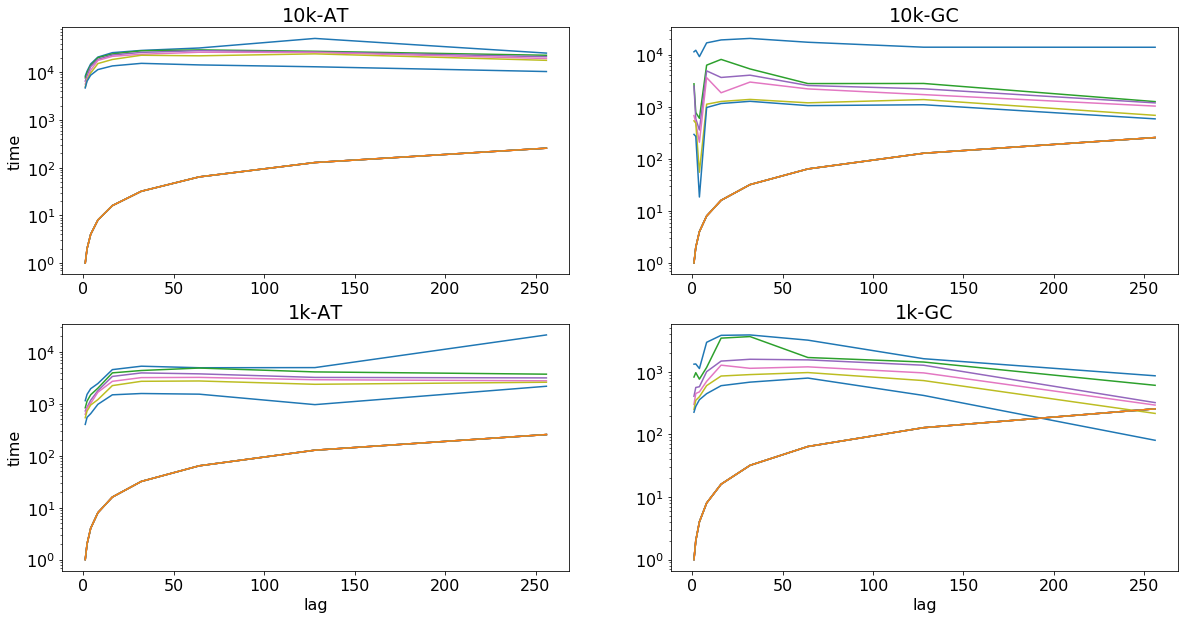

In [13]:
## makes plots

fig, ax = plt.pyplot.subplots(2, 2, figsize=(20, 10))
plt.rcParams.update({'font.size': 16})

for j, key in enumerate(y_dict):
    
    x = int(j/2)
    y = j % 2
    
    for i in range(n_sm):

        y_list = y_dict[key][:, i]
        ax[x, y].semilogy(x_list, y_list, label=str(i) + ' sm')
        ax[x, y].semilogy(x_list, x_list, label=str(i) + ' sm')
        
        if x == 1:
            ax[x, y].set_xlabel('lag')
        if y == 0:
            ax[x, y].set_ylabel('time')
        ax[x, y].set_title(key)